In [4]:
import matplotlib
import pathlib
import mne

In [5]:
# use this can show graph in new page!
# useful!
# matplotlib.use('Qt5Agg')

In [6]:
# data_folder = mne.datasets.sample.data_path('OpenMIIR-RawEEG_v1')
# data_raw_file = os.path.join(data_folder, 'MEG', 'sample',
#                                     'P01-raw.fif')
fname = 'OpenMIIR-RawEEG_v1/P01-raw.fif'
raw = mne.io.read_raw_fif(fname, preload=True)
raw

Opening raw data file OpenMIIR-RawEEG_v1/P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...


<Raw | P01-raw.fif, 69 x 2478166 (4840.2 s), ~1.27 GB, data loaded>

Using matplotlib as 2D backend.


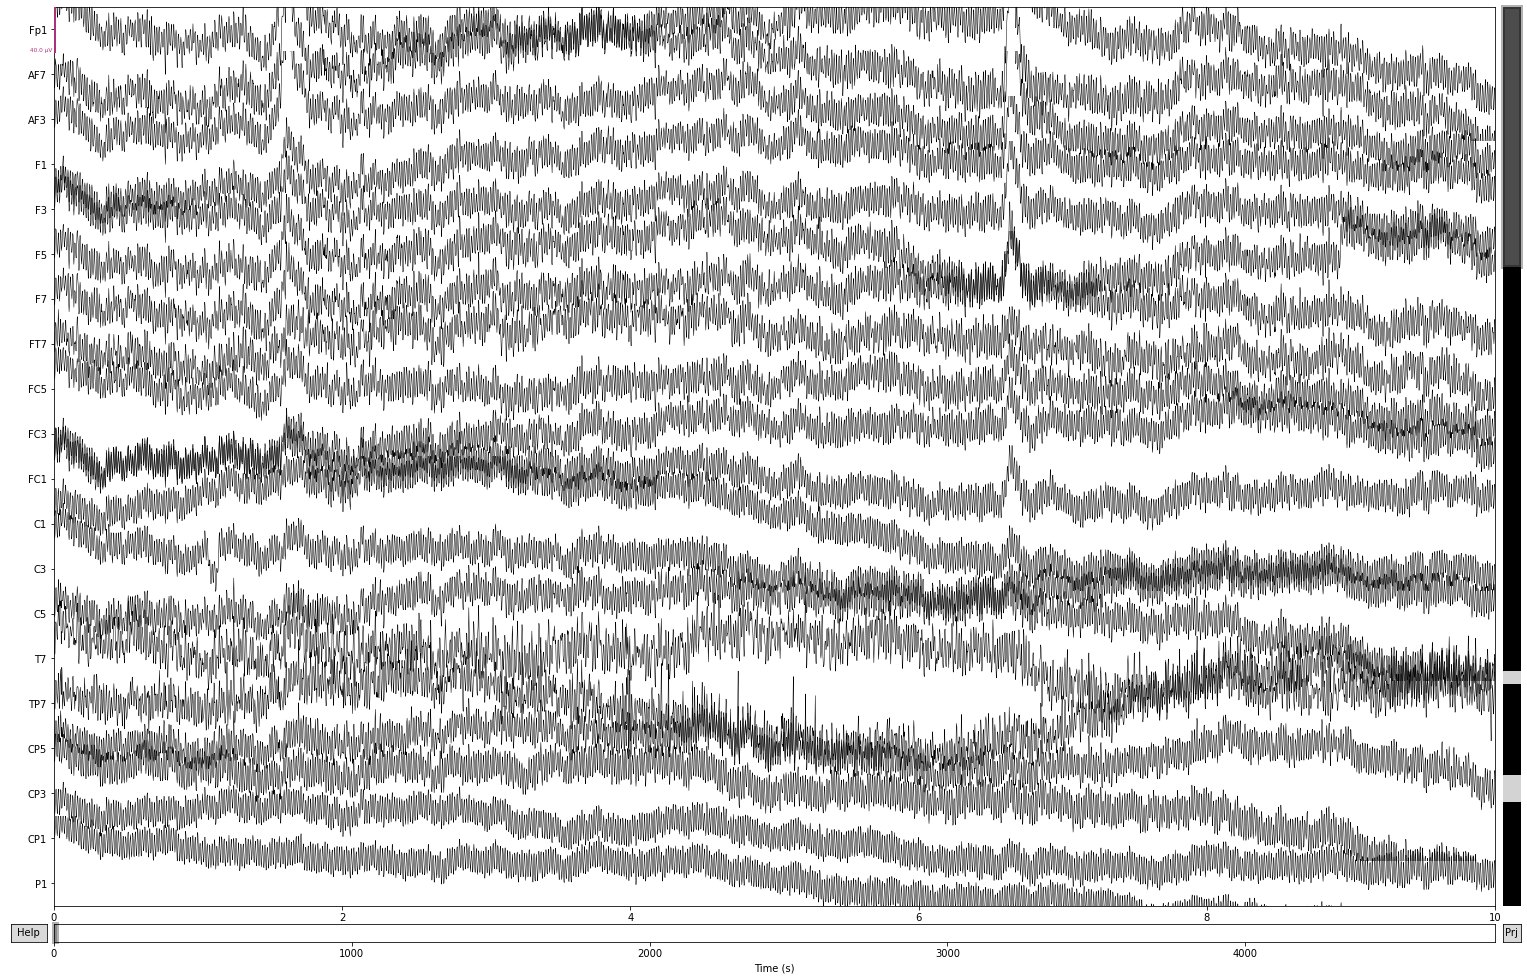

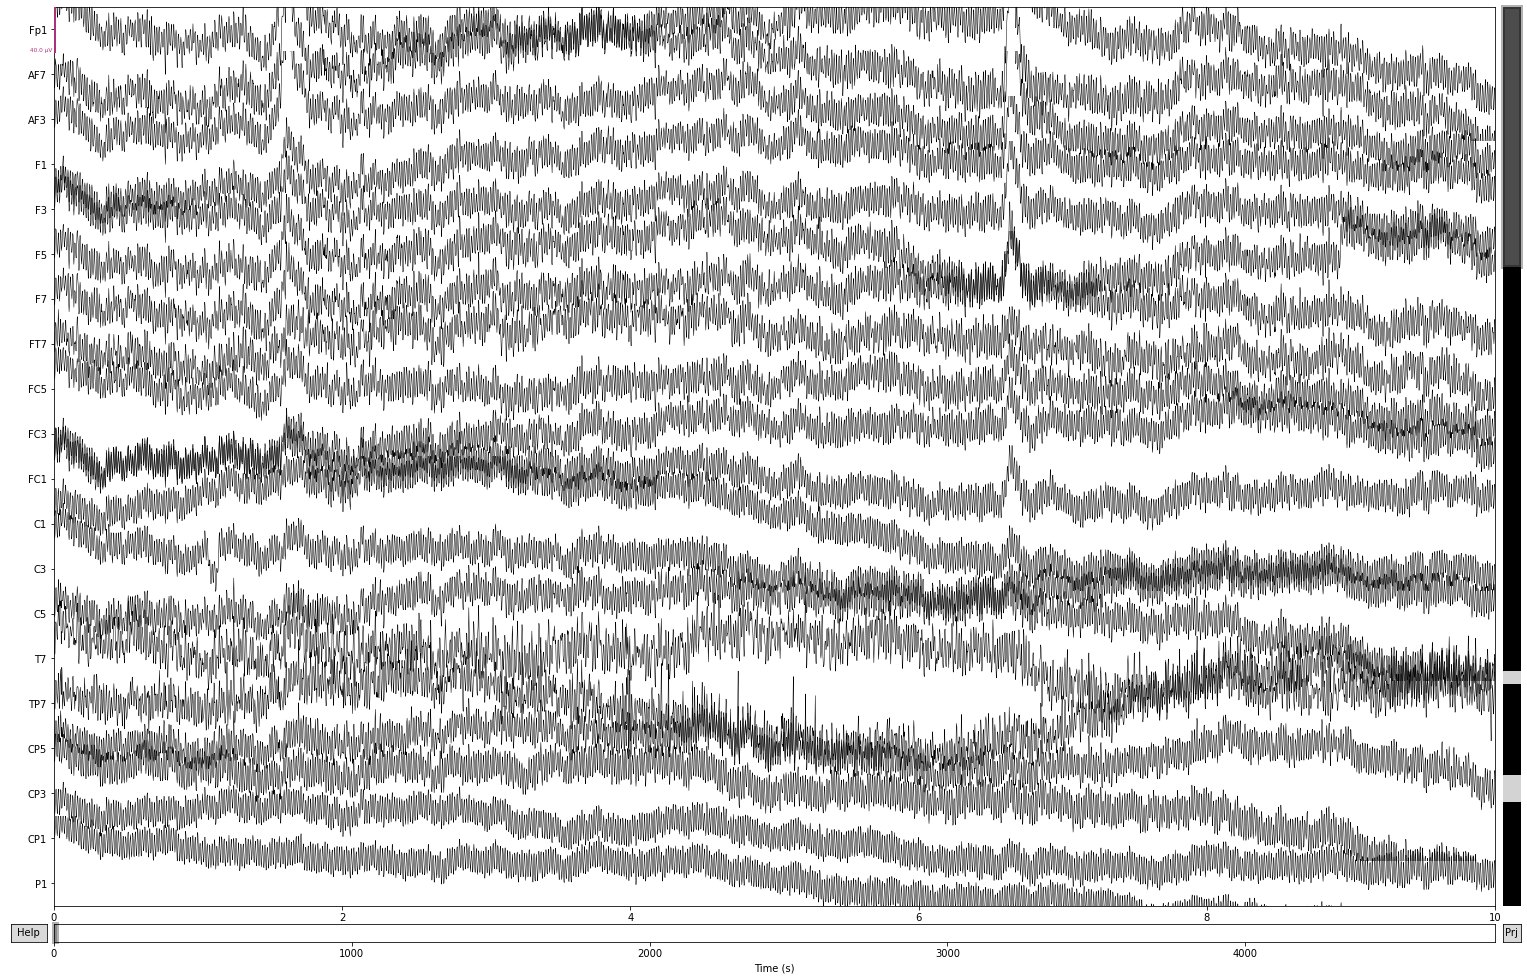

In [7]:
raw.plot()

In [8]:
events = mne.find_events(raw) # 51 IDs

540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]


In [9]:
events

array([[    512,       0,     121],
       [    520,       0,    1000],
       [   8141,       0,     122],
       ...,
       [2459915,       0,    2001],
       [2467882,       0,     224],
       [2467925,       0,    2001]], dtype=int64)

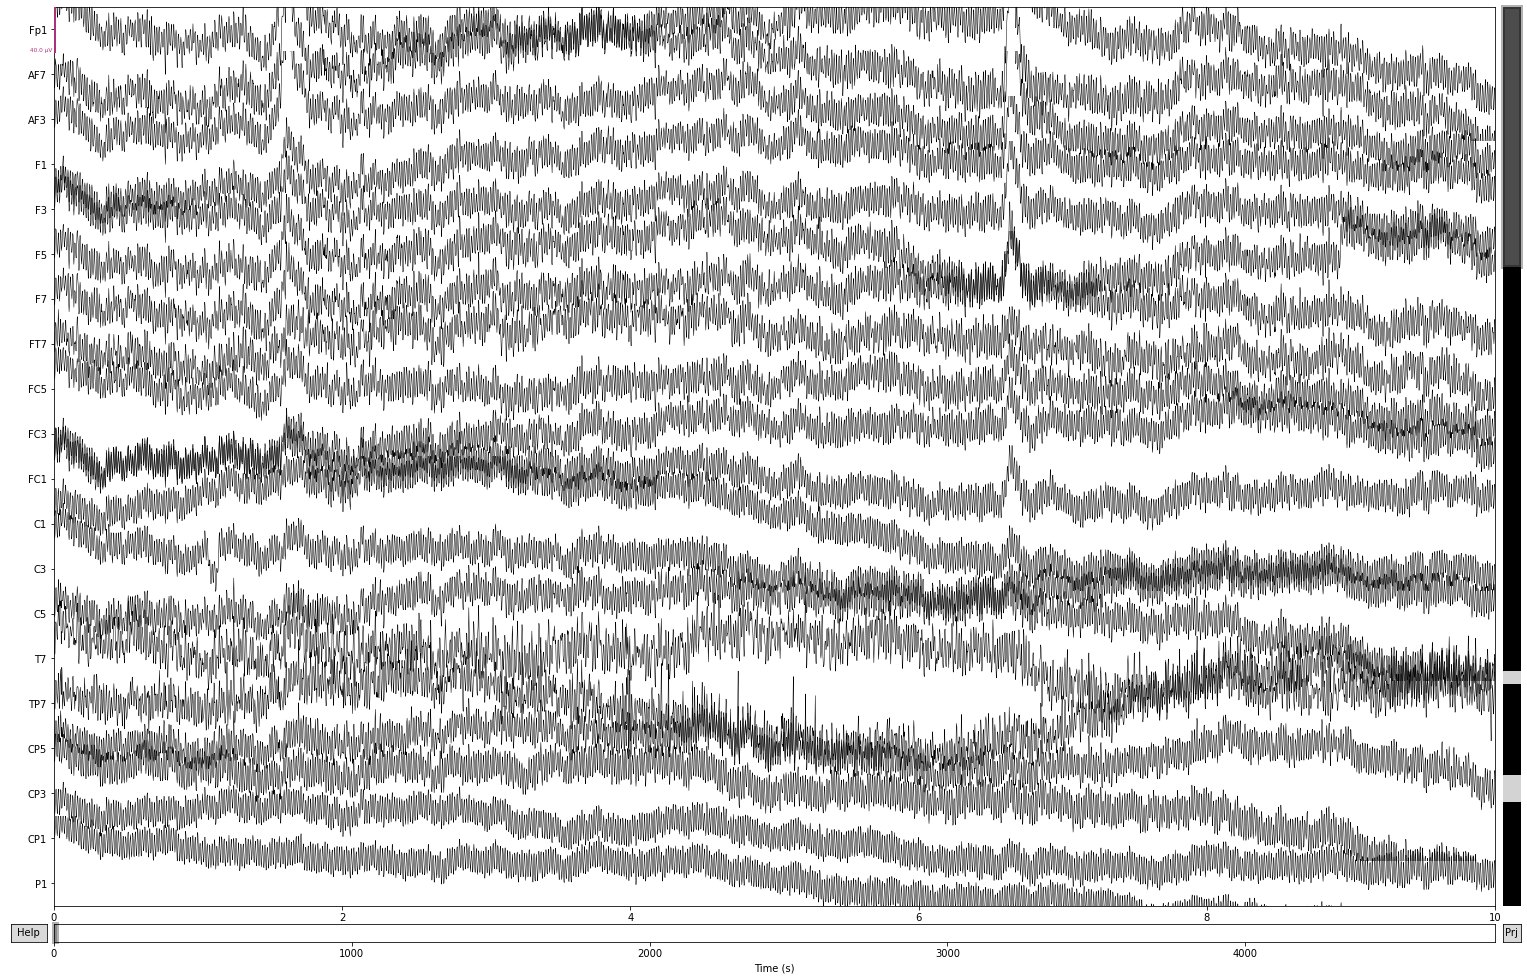

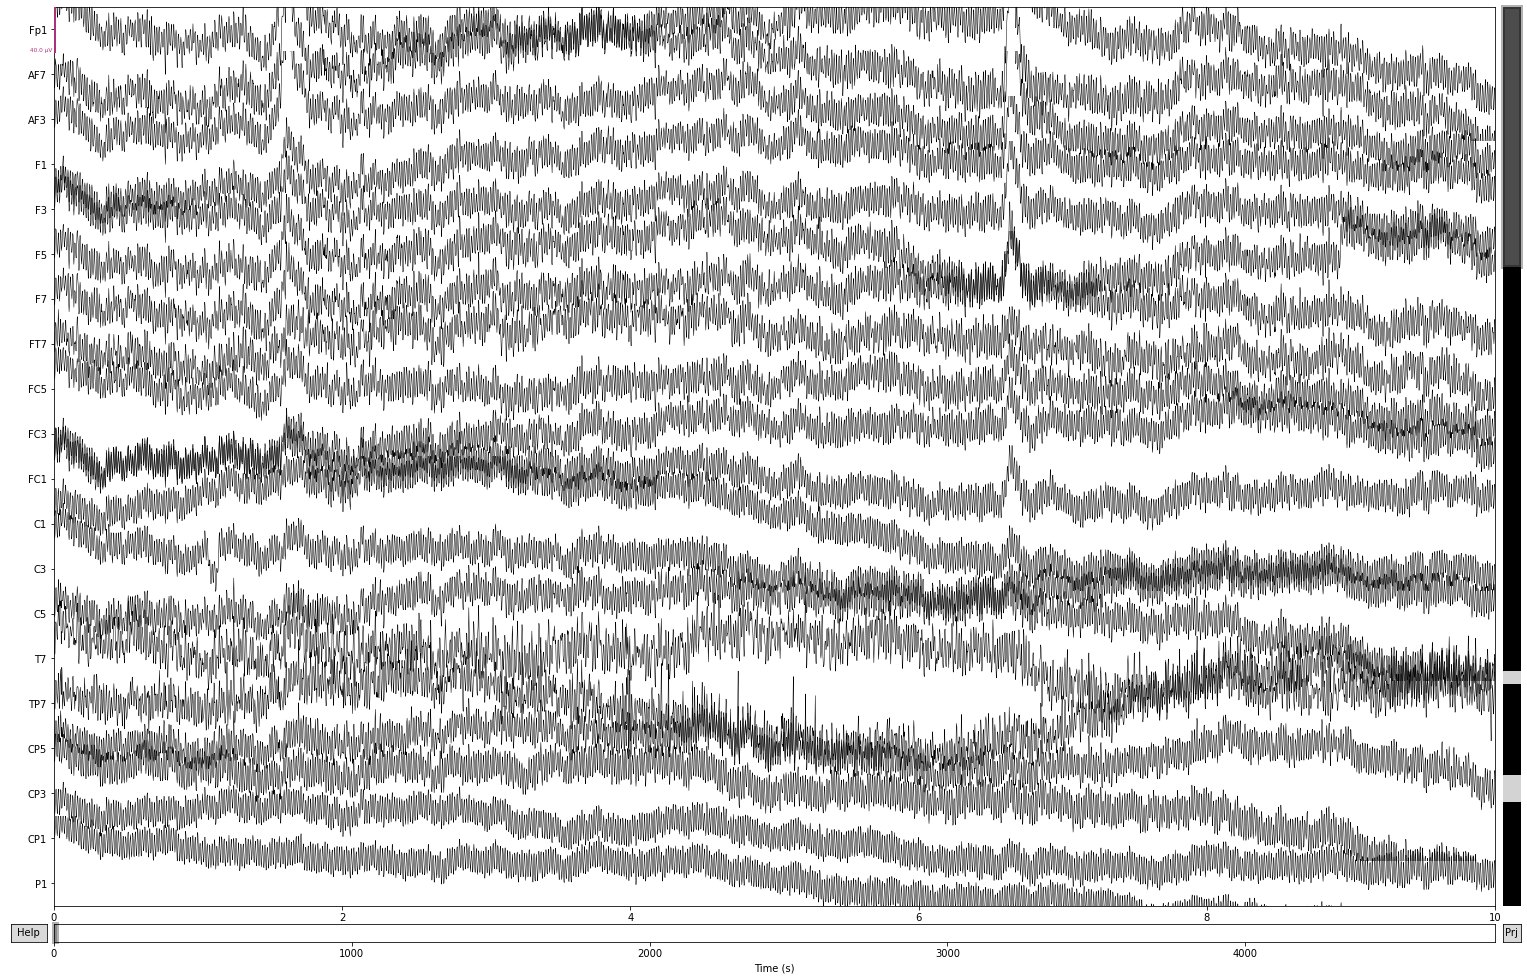

In [10]:
raw.plot()

## Visualize the sensor locations

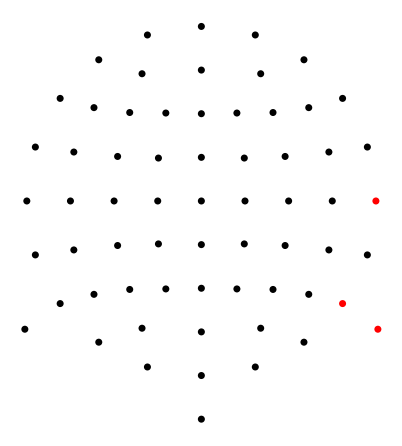

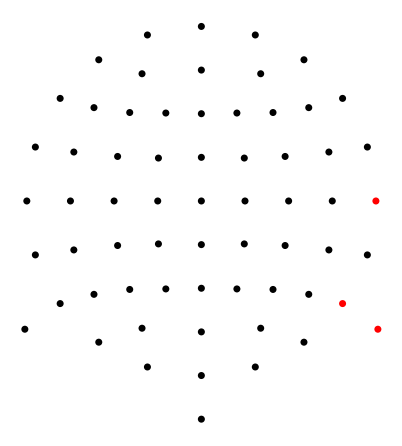

In [11]:
raw.plot_sensors(ch_type='eeg')

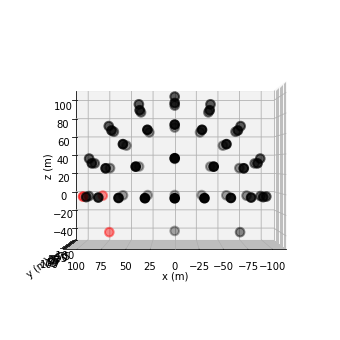

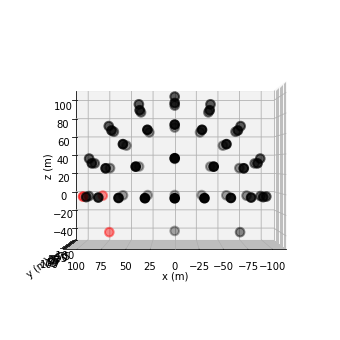

In [12]:
raw.plot_sensors(kind='3d', ch_type='eeg')

## Select only a subset of the channels

In [13]:
raw.info

<Info | 11 non-empty values
 bads: 3 items (P8, P10, T8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 1 Stimulus
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2015-01-28 17:39:57 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: Average EEG reference: off
 sfreq: 512.0 Hz
>

In [14]:
raw_eeg_cropped = raw.copy().crop(tmax=100)
raw_eeg_cropped.times[-1]

100.0

In [15]:
raw_eeg_cropped_filtered = raw_eeg_cropped.filter(l_freq=0.1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16897 samples (33.002 sec)



In [16]:
raw_eeg_cropped.load_data()
raw_eeg_cropped_filtered = raw_eeg_cropped.copy().filter(l_freq=0.1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16897 samples (33.002 sec)



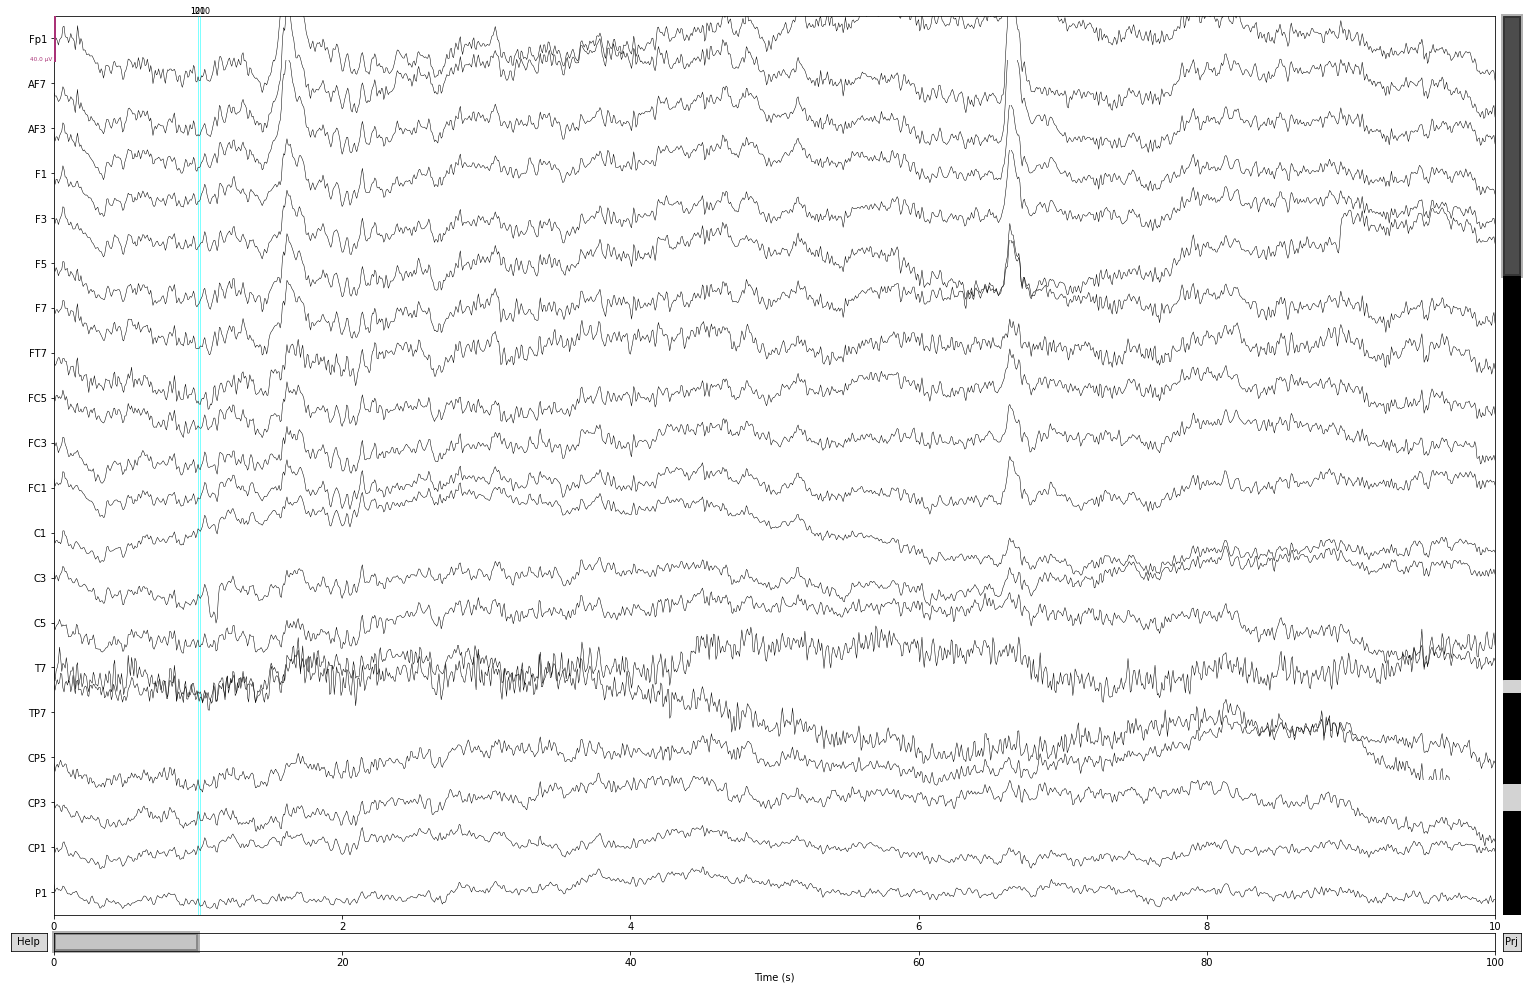

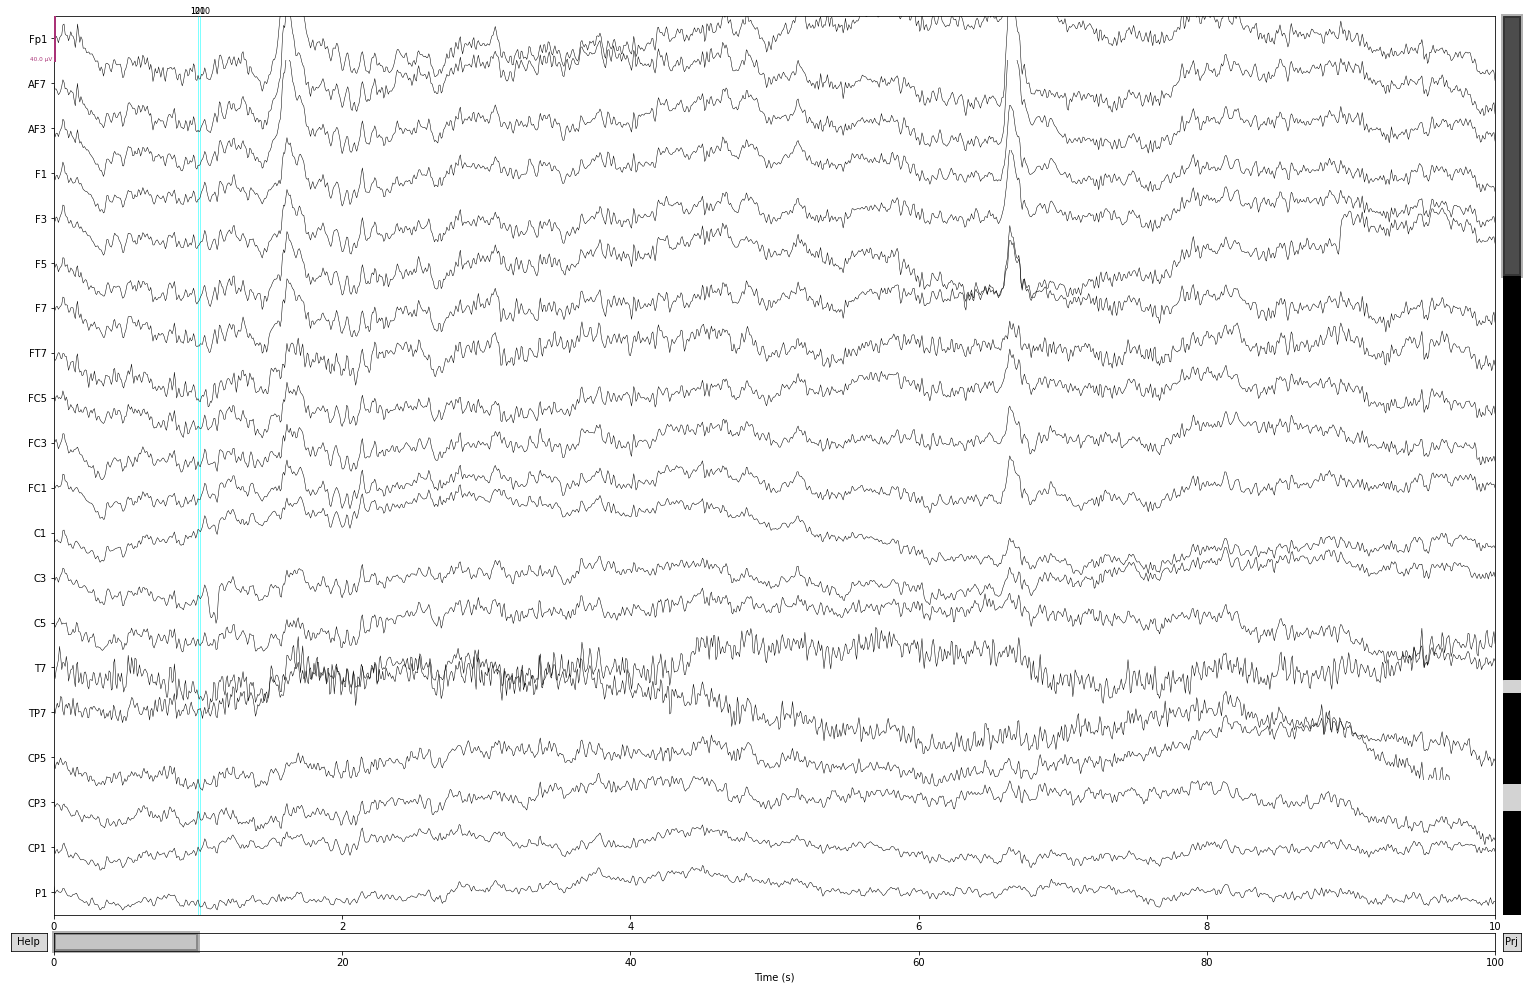

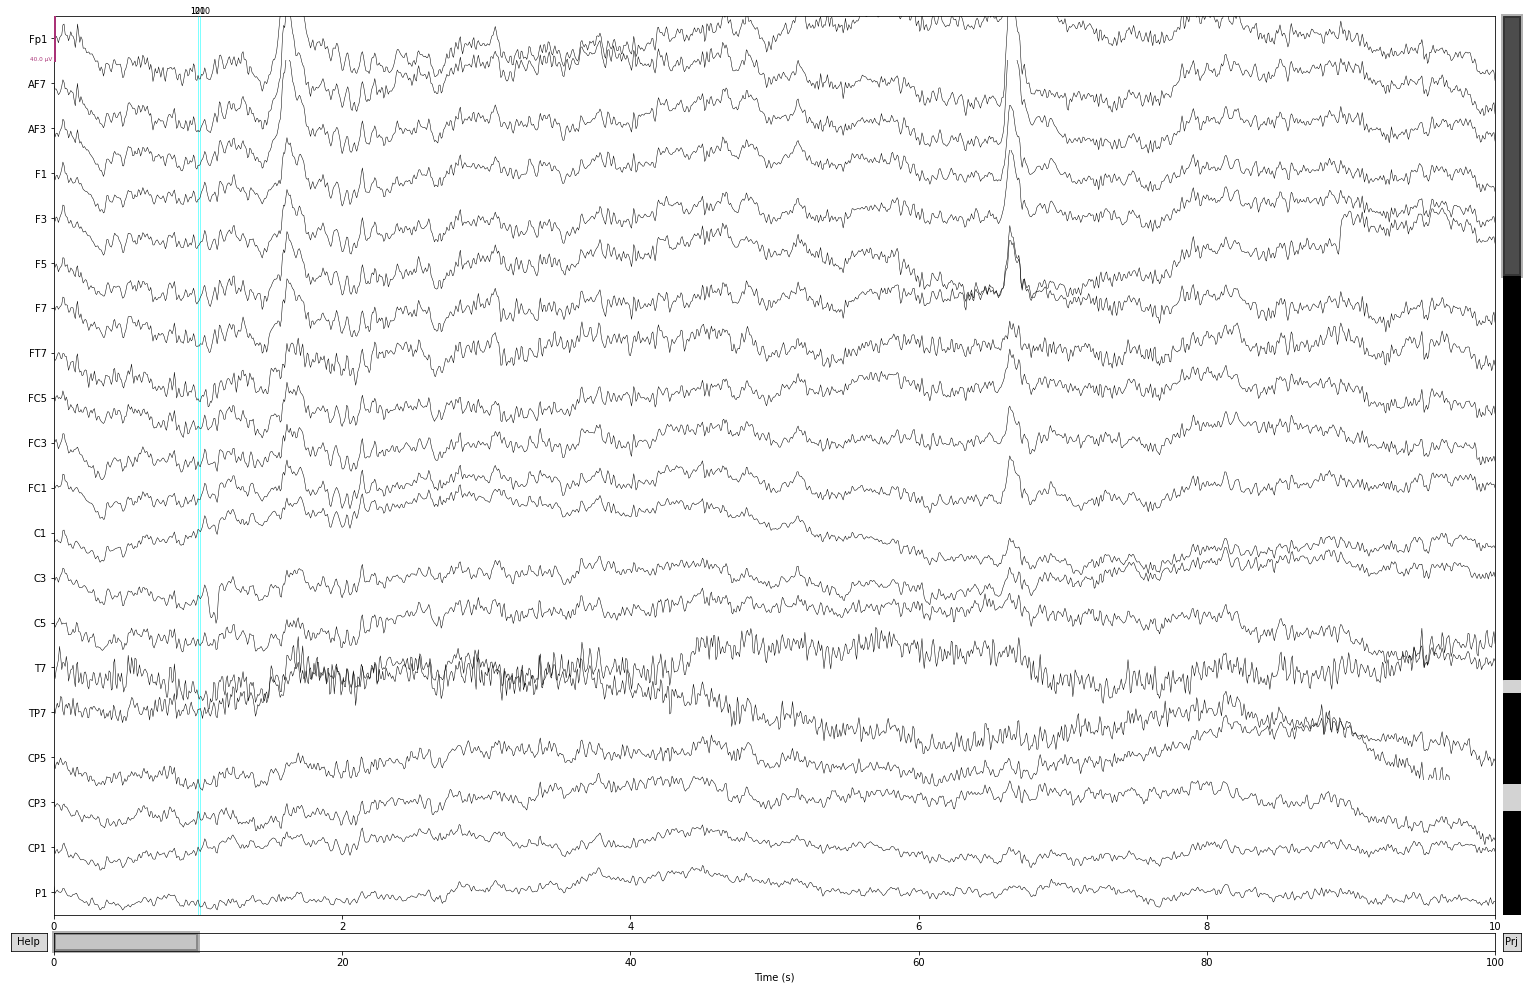

In [17]:
raw_eeg_cropped.plot(events=events)
raw_eeg_cropped_filtered.plot(events=events)